In [572]:
import matplotlib.pyplot as plt
import json
import numpy as np
from collections import defaultdict

In [573]:
filepath = './'

In [574]:
with open(filepath + 'losses-SGD.json', 'r') as file:
    sgd_losses = json.load(file)

In [575]:
with open(filepath + 'losses-CD-Max.json', 'r') as file:
    cdmax_losses = json.load(file)
with open(filepath + 'losses-CD-Min.json', 'r') as file:
    cdmin_losses = json.load(file)

In [576]:
with open(filepath + 'losses-Random.json', 'r') as file:
    random_losses = json.load(file)

In [577]:
with open(filepath + 'losses-CD-KSparse.json', 'r') as file:
    sparse_losses = json.load(file)

In [578]:
with open(filepath + 'losses-sklearn.json', 'r') as file:
    loss_sklearn = json.load(file)

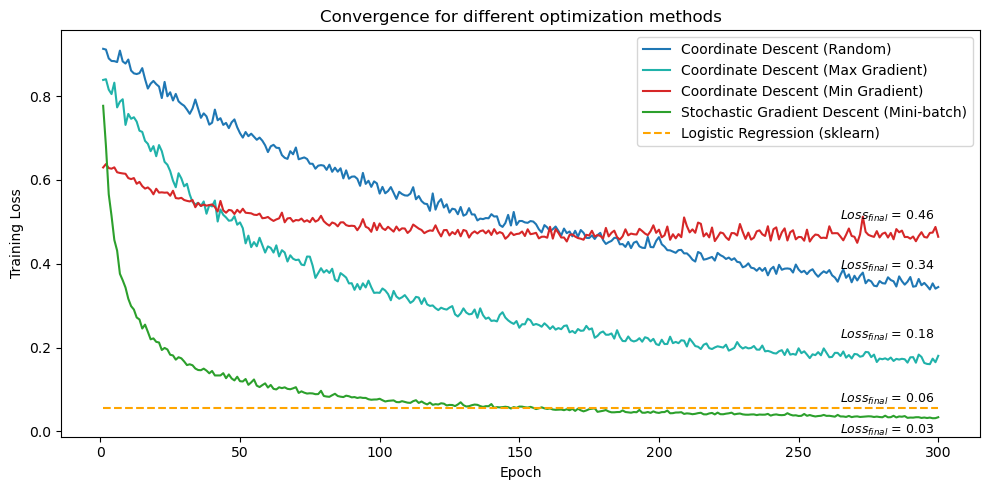

In [579]:
# Epochs (x-axis)
epochs = np.arange(1, 301)
sklearn_losses = [loss_sklearn]*300

# Set up figure
plt.figure(figsize=(10, 5))

ax = plt.gca()  # Get current axes

ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')

line_random,  = ax.plot(epochs, random_losses, color='tab:blue',  label='Coordinate Descent (Random)')
line_cd_max,  = ax.plot(epochs, cdmax_losses, color='lightseagreen',  label='Coordinate Descent (Max Gradient)')
line_cd_min,  = ax.plot(epochs, cdmin_losses, color='tab:red',  label='Coordinate Descent (Min Gradient)')
line_sgd,  = ax.plot(epochs, sgd_losses, color='tab:green',  label='Stochastic Gradient Descent (Mini-batch)')
line_sklearn,  = ax.plot(epochs, sklearn_losses, linestyle="dashed", color='orange',  label='Logistic Regression (sklearn)')

lines_legend, lines_labels = ax.get_legend_handles_labels()
ax.legend(lines_legend, lines_labels, loc='best')

x_point = 300
for d in [random_losses, cdmax_losses, cdmin_losses]:
    y_point = d[-1]
    text = '$Loss_{' + 'final}$'
    plt.annotate(f'{text} = {y_point:.2f}', 
                xy=(x_point, y_point),
                xytext=(x_point - 35, y_point + 0.04),  # Text position
                #  arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
                fontsize=9)
    
y_point = sgd_losses[-1]
plt.annotate(f'{text} = {y_point:.2f}', 
                xy=(x_point, y_point),
                xytext=(x_point - 35, y_point - 0.04),  # Text position
                #  arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
                fontsize=9)

y_point = sklearn_losses[-1]
plt.annotate(f'{text} = {y_point:.2f}', 
                xy=(x_point, y_point),
                xytext=(x_point - 35, y_point + 0.01),  # Text position
                #  arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
                fontsize=9)

plt.title('Convergence for different optimization methods')
plt.tight_layout()
plt.savefig('./convergence.png')
plt.show()


In [580]:
print(f"Sklearn's Logistic Regressor with a default LBFGS solver achieves a final training loss of {sklearn_losses[-1]:.4f}\n")
print("Training losses for Coordinate Descent (random, max, min), SGD, respectively:")
for values in zip(epochs, random_losses, cdmax_losses, cdmin_losses, sgd_losses):
    if values[0] % 25 == 0:
        print(f'Epoch {values[0]} \tCD Random: {values[1]:.4f}, \tCD Max: {values[2]:.4f}, \tCD Min: {values[3]:.4f}, \tSGD: {values[4]:.4f}')

Sklearn's Logistic Regressor with a default LBFGS solver achieves a final training loss of 0.0570

Training losses for Coordinate Descent (random, max, min), SGD, respectively:
Epoch 25 	CD Random: 0.8090, 	CD Max: 0.6211, 	CD Min: 0.5623, 	SGD: 0.1830
Epoch 50 	CD Random: 0.7115, 	CD Max: 0.4987, 	CD Min: 0.5220, 	SGD: 0.1199
Epoch 75 	CD Random: 0.6387, 	CD Max: 0.4170, 	CD Min: 0.4992, 	SGD: 0.0911
Epoch 100 	CD Random: 0.5674, 	CD Max: 0.3306, 	CD Min: 0.4961, 	SGD: 0.0780
Epoch 125 	CD Random: 0.5220, 	CD Max: 0.2955, 	CD Min: 0.4676, 	SGD: 0.0633
Epoch 150 	CD Random: 0.5020, 	CD Max: 0.2474, 	CD Min: 0.4719, 	SGD: 0.0594
Epoch 175 	CD Random: 0.4613, 	CD Max: 0.2433, 	CD Min: 0.4674, 	SGD: 0.0532
Epoch 200 	CD Random: 0.4635, 	CD Max: 0.2059, 	CD Min: 0.4814, 	SGD: 0.0442
Epoch 225 	CD Random: 0.4148, 	CD Max: 0.1928, 	CD Min: 0.4568, 	SGD: 0.0433
Epoch 250 	CD Random: 0.3863, 	CD Max: 0.1983, 	CD Min: 0.4640, 	SGD: 0.0369
Epoch 275 	CD Random: 0.3615, 	CD Max: 0.1889, 	CD Min: 

In [581]:
with open(filepath + 'losses-CD-Ksparse-Trials2.json', 'r') as file:
    execution_data = json.load(file)

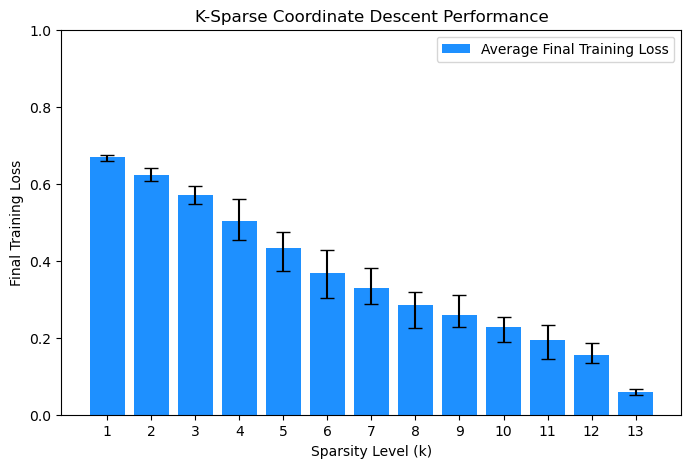

In [585]:
# Epochs (x-axis)
k_range = np.arange(1, 14)

# Set up figure
plt.figure(figsize=(8, 5))

ax = plt.gca()  # Get current axes

ax.set_xlabel('Sparsity (K)')
ax.set_ylabel('Training Loss')

k_range = []
mean = []
min = []
max = []

for k in execution_data:
    final = np.array(execution_data[k])
    k_range.append(k)
    mean.append(final.mean(axis=0)[0])
    min.append(final.min(axis=0)[0])
    max.append(final.max(axis=0)[0]) 

mean, min, max = np.array(mean), np.array(min), np.array(max)

# Calculate error bars (upper and lower deviations from the mean)
yerr = np.vstack([mean - min, max - mean])
    
# line_mean,  = ax.plot(k_range, mean, color='tab:blue', label='K-Sparse Coordinate Descent')
# ax.fill_between(k_range, min, max, color='tab:blue', alpha=0.2)


ax.set_ylim(0, 1.0)
ax.bar(k_range, mean, yerr=yerr, capsize=5, color='dodgerblue', label='Average Final Training Loss')

# Labels and title
ax.set_xlabel('Sparsity Level (k)')
ax.set_ylabel('Final Training Loss')
ax.set_title('K-Sparse Coordinate Descent Performance')
ax.legend()
plt.savefig('./k-sparse.png')
plt.show()



In [583]:
print("Final Training losses for Coordinate Descent at different sparsity levels (k):")
for values in zip(k_range, mean):
    print(f'Sparsity k={values[0]} \tFinal Training Loss: {values[1]:.4f}')

Final Training losses for Coordinate Descent at different sparsity levels (k):
Sparsity k=1 	Final Training Loss: 0.6684
Sparsity k=2 	Final Training Loss: 0.6237
Sparsity k=3 	Final Training Loss: 0.5702
Sparsity k=4 	Final Training Loss: 0.5037
Sparsity k=5 	Final Training Loss: 0.4320
Sparsity k=6 	Final Training Loss: 0.3693
Sparsity k=7 	Final Training Loss: 0.3298
Sparsity k=8 	Final Training Loss: 0.2843
Sparsity k=9 	Final Training Loss: 0.2595
Sparsity k=10 	Final Training Loss: 0.2270
Sparsity k=11 	Final Training Loss: 0.1944
Sparsity k=12 	Final Training Loss: 0.1563
Sparsity k=13 	Final Training Loss: 0.0588
